In [1]:
import pandas as pd
import numpy as np
import re
import datetime
from datetime import datetime
from datetime import date, timedelta

In [2]:
rest = pd.read_csv('main_task.csv')

# Первоначальный осмотр данных

In [3]:
rest

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [4]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [5]:
rest.describe()

,Ranking,Rating,Number of Reviews
count,40000.000000,40000.000000,37457.000000
mean,3676.028525,3.993037,124.825480
std,3708.749567,0.668417,295.666352
min,1.000000,1.000000,2.000000
25%,973.000000,3.500000,9.000000
50%,2285.000000,4.000000,33.000000
75%,5260.000000,4.500000,115.000000
max,16444.000000,5.000000,9660.000000


In [6]:
rest['URL_TA']

0        /Restaurant_Review-g187147-d1912643-Reviews-R_...
1        /Restaurant_Review-g189852-d7992032-Reviews-Bu...
2        /Restaurant_Review-g186338-d8632781-Reviews-RO...
3        /Restaurant_Review-g187323-d1358776-Reviews-Es...
4        /Restaurant_Review-g187309-d6864963-Reviews-Au...
                               ...                        
39995    /Restaurant_Review-g187849-d2104414-Reviews-Ro...
39996    /Restaurant_Review-g187147-d1800036-Reviews-La...
39997    /Restaurant_Review-g189852-d947615-Reviews-Sus...
39998    /Restaurant_Review-g274856-d1100838-Reviews-Ho...
39999    /Restaurant_Review-g187849-d1109020-Reviews-Ta...
Name: URL_TA, Length: 40000, dtype: object

In [7]:
rest['URL_TA'].loc[0]

'/Restaurant_Review-g187147-d1912643-Reviews-R_Yves-Paris_Ile_de_France.html'

In [8]:
rest['ID_TA'].loc[0]

'd1912643'

In [9]:
rest['Restaurant_id'].loc[0]

'id_5569'

In [10]:
# rest['Number of Reviews'].isna().sum()

In [11]:
rest['Number of Reviews_NaN'] = pd.isna(
    rest['Number of Reviews']).astype('uint8')

In [12]:
rest['Number of Reviews'].fillna(0, inplace=True)

In [13]:
rest['City'].value_counts().count()

31

In [14]:
city_dummy = pd.get_dummies(rest['City'], prefix='City')

In [15]:
# rest = pd.get_dummies(rest, columns = ['City',], dummy_na = True)

In [16]:
city_dummy.columns

Index(['City_Amsterdam', 'City_Athens', 'City_Barcelona', 'City_Berlin',
       'City_Bratislava', 'City_Brussels', 'City_Budapest', 'City_Copenhagen',
       'City_Dublin', 'City_Edinburgh', 'City_Geneva', 'City_Hamburg',
       'City_Helsinki', 'City_Krakow', 'City_Lisbon', 'City_Ljubljana',
       'City_London', 'City_Luxembourg', 'City_Lyon', 'City_Madrid',
       'City_Milan', 'City_Munich', 'City_Oporto', 'City_Oslo', 'City_Paris',
       'City_Prague', 'City_Rome', 'City_Stockholm', 'City_Vienna',
       'City_Warsaw', 'City_Zurich'],
      dtype='object')

In [17]:
city_dummy.shape

(40000, 31)

In [18]:
rest.nunique(dropna=False)

Restaurant_id            11909
City                        31
Cuisine Style             9008
Ranking                  11936
Rating                       9
Price Range                  4
Number of Reviews         1460
Reviews                  33516
URL_TA                   39980
ID_TA                    39980
Number of Reviews_NaN        2
dtype: int64

In [19]:
rest['Price Range'].unique()

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

4.1 Вопросы о ценах

In [20]:
rest['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [21]:
rest['Price Range'].isna().sum()

13886

In [22]:
rest['Price Range'].describe()

count        26114
unique           3
top       $$ - $$$
freq         18412
Name: Price Range, dtype: object

In [23]:
rest['Price Range'].fillna('$$ - $$$', inplace = True)

In [24]:
# Создание ранговой числовой переменной 'price'
rest['price'] = rest['Price Range'].apply(lambda x: 1 if x == '$' else 2 if x == '$$ - $$$' else 3)

In [25]:
rest.shape

(40000, 12)

In [26]:
# Векторизация 'Price Range'
data_nonbinary = pd.get_dummies(rest['Price Range'], prefix = 'price')

In [27]:
# data_nonbinary

 ## Датасет rest_1 без обработки признаков 'Cuisine Style' и 'Reviews'.  

In [28]:
frame = [rest, city_dummy]
rest_1 = pd.concat(frame, axis=1)
rest_1.shape

(40000, 43)

In [29]:
rest_1.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA',
       'Number of Reviews_NaN', 'price', 'City_Amsterdam', 'City_Athens',
       'City_Barcelona', 'City_Berlin', 'City_Bratislava', 'City_Brussels',
       'City_Budapest', 'City_Copenhagen', 'City_Dublin', 'City_Edinburgh',
       'City_Geneva', 'City_Hamburg', 'City_Helsinki', 'City_Krakow',
       'City_Lisbon', 'City_Ljubljana', 'City_London', 'City_Luxembourg',
       'City_Lyon', 'City_Madrid', 'City_Milan', 'City_Munich', 'City_Oporto',
       'City_Oslo', 'City_Paris', 'City_Prague', 'City_Rome', 'City_Stockholm',
       'City_Vienna', 'City_Warsaw', 'City_Zurich'],
      dtype='object')

In [30]:
# Удаление ненужных признаков в rest_1
colum = ['Restaurant_id', 'City', 'Cuisine Style',
         'Price Range', 'Reviews',  'URL_TA', 'ID_TA']
rest_1.drop(colum, axis=1, inplace=True)

In [31]:
rest_1.shape

(40000, 36)

### Обработка признака 'Cuisine Style'

In [32]:
rest['Cuisine Style'].value_counts()

['Italian']                                                                                                  1032
['French']                                                                                                    805
['Spanish']                                                                                                   695
['French', 'European']                                                                                        405
['Cafe']                                                                                                      403
                                                                                                             ... 
['Italian', 'Steakhouse', 'European']                                                                           1
['Mediterranean', 'Middle Eastern', 'Bar']                                                                      1
['Polish', 'European', 'Central European', 'Vegetarian Friendly', 'Vegan Options', 'Glut

In [33]:
rest['Cuisine Style'].dtype

dtype('O')

In [34]:
type(rest['Cuisine Style'][0])

str

In [35]:
rest['Cuisine Style'].isna().sum()

9283

In [36]:
cuisine = set()
for i in range(0, len(rest)):
    s = rest['Cuisine Style'].loc[i]
    style = []
    if (isinstance(s, str)):
        style = re.findall(r'[&a-z A-Z]+', s)
        for item in style:
            cuisine.add(item)

print(len(cuisine))

126


In [37]:
# cuisine

In [38]:
cuisine.discard(' ')
cuisine.add('Fictive')

In [39]:
st = []
for i in range(0, len(rest)):
    s = rest['Cuisine Style'].loc[i]
    if (isinstance(s, str)):
        ss = s[1:-1]
        s1 = ss.replace("'", "")
        s2 = s1.split(', ')
        st.append(s2)
    else:
        st.append([])
# st
# rest['style'] = pd.Series(st)
# rest['style'].value_counts()

In [40]:
rest['style'] = pd.Series(st)

In [41]:
rest.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA',
       'Number of Reviews_NaN', 'price', 'style'],
      dtype='object')

In [42]:
rest['style'].value_counts()

[]                                                                                                             9283
[Italian]                                                                                                      1032
[French]                                                                                                        805
[Spanish]                                                                                                       695
[French, European]                                                                                              405
                                                                                                               ... 
[Italian, Pizza, European, International, Czech, Central European, Vegetarian Friendly]                           1
[Japanese, Asian, Soups, Sushi, Vegetarian Friendly, Gluten Free Options, Vegan Options]                          1
[American, Fast Food, Grill, Contemporary, Vegetarian Friendly, Gluten F

In [43]:
# Создание фиктивного типа кухни для ресторанов, в которых отсутствуют данные(NaN) в полях признака 'Cuisine Style'
rest['style'] = rest['style'].apply(
    lambda x: ['Fictive'] if len(x) == 0 else x)
# rest['style']

In [44]:
# Создание признаков по типам кухонь (всего 125 + фиктивный)
def find_item(cell):
    if item in cell:
        return 1
    return 0


for item in cuisine:
    rest[item] = rest['style'].apply(find_item)

In [45]:
rest['count_cuisine'] = rest['style'].apply(
    lambda x: len(x) if len(x) != 0 else 1)

In [46]:
rest['count_cuisine'].describe()

count    40000.000000
mean         2.622400
std          1.817292
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         21.000000
Name: count_cuisine, dtype: float64

In [47]:
rest.shape

(40000, 140)

In [48]:
# list(rest.columns)

In [49]:
rest['Fictive'].value_counts()

0    30717
1     9283
Name: Fictive, dtype: int64

In [50]:
max = 0
style_1 = ''
for item in cuisine:
    r_max = sum(rest[item] == 1)
    if (r_max > max):
        max = r_max
        style_1 = item
print(style_1, max)

Vegetarian Friendly 11189


### Обработка признака 'Reviews'

In [51]:
rest['dates'] = rest['Reviews'].apply(lambda x: (
    re.findall(r'\d\d/\d\d/\d{4}', x)) if len(x) > 8 else 0)


def func(x):
    try:
        return datetime.strptime(x, '%m/%d/%Y')
    except:
        return pd.NaT


days = []
for i in range(0, len(rest)):
    if (rest['dates'].loc[i] != 0):
        if (len(rest['dates'].loc[i]) == 2):
            days.append((func(rest['dates'].loc[i][0]) -
                         func(rest['dates'].loc[i][1])).days)
        else:
            days.append((func(rest['dates'].loc[i][0]) -
                         func(rest['dates'].loc[i][0])).days)
    else:
        days.append(0)
rest['c_days'] = pd.Series(days)
rest['c_days'] = rest['c_days'].apply(lambda x: x if x >= 0 else -x)

In [52]:
rest.shape

(40000, 142)

In [53]:
rest['c_days'].describe()

count    40000.000000
mean       102.645675
std        198.594208
min          0.000000
25%          0.000000
50%         28.000000
75%        120.000000
max       3207.000000
Name: c_days, dtype: float64

### Датасет rest_2 с включением ранговых цен ресторанов 'price' , с количеством дней между отзывами  'c_days', с включением dummy  признаков "Cuisine Style" и с признаком о кол-ве типов кухонь 'count_style'

In [54]:
frame = [rest, city_dummy]
rest_2 = pd.concat(frame, axis=1)

In [55]:
# Удаление ненужных признаков в rest_2
colum = ['Restaurant_id', 'City', 'Cuisine Style', 'style',
         'Price Range', 'Reviews', 'dates', 'URL_TA', 'ID_TA']
rest_2.drop(colum, axis=1, inplace=True)

In [56]:
rest_2.columns

Index(['Ranking', 'Rating', 'Number of Reviews', 'Number of Reviews_NaN',
       'price', 'Indian', 'European', 'Scandinavian', 'Slovenian',
       'Azerbaijani',
       ...
       'City_Munich', 'City_Oporto', 'City_Oslo', 'City_Paris', 'City_Prague',
       'City_Rome', 'City_Stockholm', 'City_Vienna', 'City_Warsaw',
       'City_Zurich'],
      dtype='object', length=164)

In [57]:
rest_2.shape

(40000, 164)

# Визуальный анализ данных

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

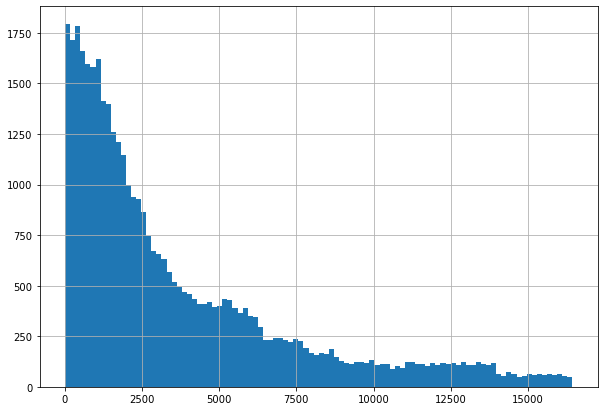

In [59]:
plt.rcParams['figure.figsize']=(10,7)
rest['Ranking'].hist(bins=100)

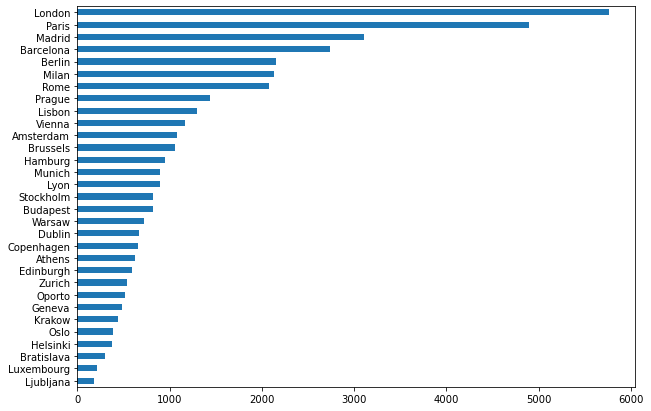

In [60]:
rest['City'].value_counts(ascending = True).plot(kind = 'barh')

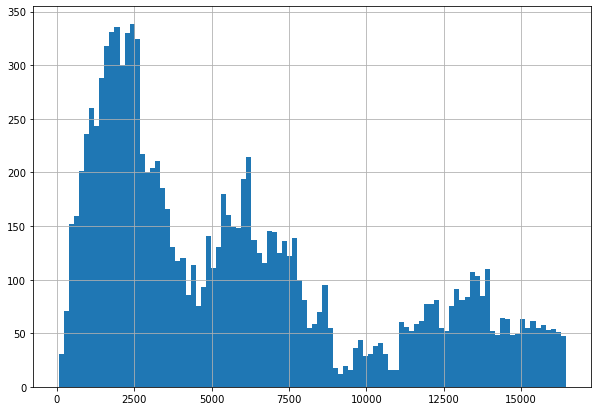

In [61]:
rest['Ranking'][rest['Rating'] < 4].hist(bins = 100)

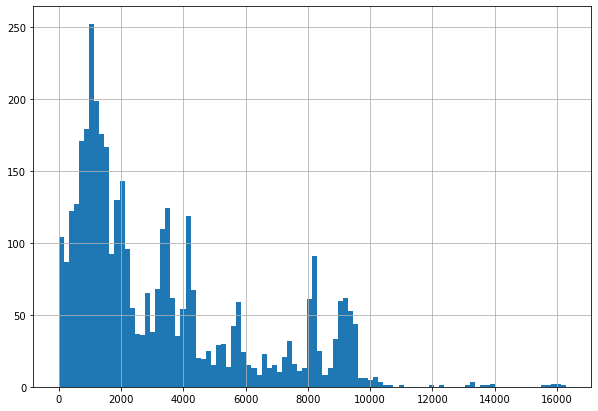

In [62]:
rest['Ranking'][rest['Rating'] == 5].hist(bins = 100)

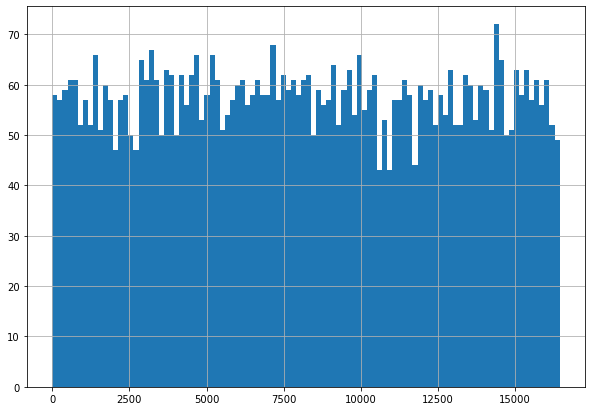

In [63]:
rest['Ranking'][rest['City']=='London'].hist(bins = 100)

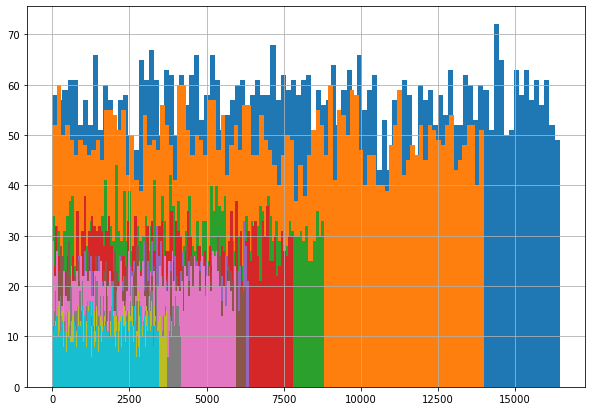

In [64]:
for x in (rest['City'].value_counts())[0:10].index:
    rest['Ranking'][rest['City'] == x].hist(bins = 100)
plt.show()

In [65]:
print((rest['City'].value_counts())[0:10].index)

Index(['London', 'Paris', 'Madrid', 'Barcelona', 'Berlin', 'Milan', 'Rome',
       'Prague', 'Lisbon', 'Vienna'],
      dtype='object')


In [66]:
# sns.heatmap(rest).corr()

### Анализ выбросов

In [67]:
rest['count_cuisine'].describe()

count    40000.000000
mean         2.622400
std          1.817292
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         21.000000
Name: count_cuisine, dtype: float64

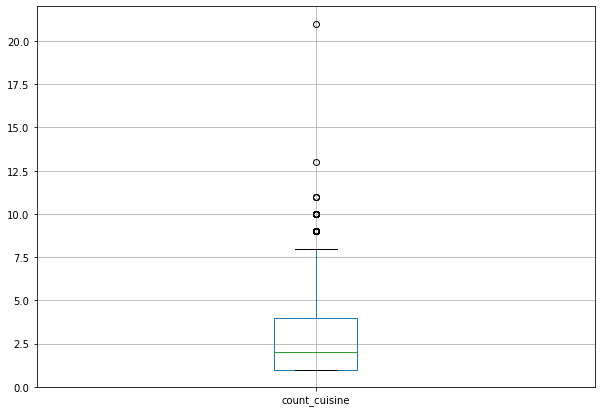

In [68]:
rest.boxplot(column = ['count_cuisine'])

In [69]:
ind_cuisine12 = rest[rest['count_cuisine'] >12].index
ind_cuisine12

Int64Index([26651, 39413], dtype='int64')

In [70]:
rest['c_days'].describe()

count    40000.000000
mean       102.645675
std        198.594208
min          0.000000
25%          0.000000
50%         28.000000
75%        120.000000
max       3207.000000
Name: c_days, dtype: float64

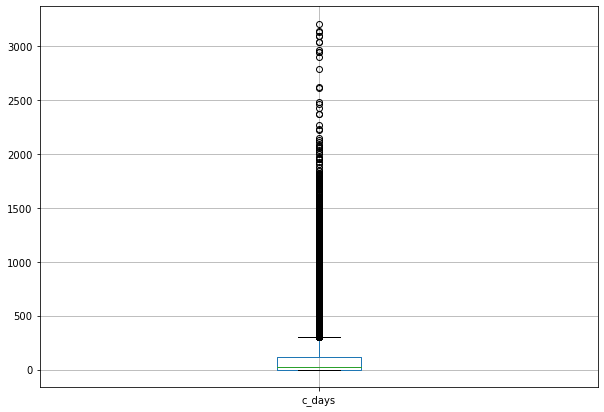

In [71]:
rest.boxplot(column = ['c_days'])

In [72]:
ind_days3000 = rest[rest['c_days'] > 3000].index
ind_days3000

Int64Index([2028, 6958, 7990, 8356, 10997, 19438, 39997], dtype='int64')

In [73]:
rest['Number of Reviews'].describe()

count    40000.000000
mean       116.889700
std        287.729821
min          0.000000
25%          7.000000
50%         28.000000
75%        105.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

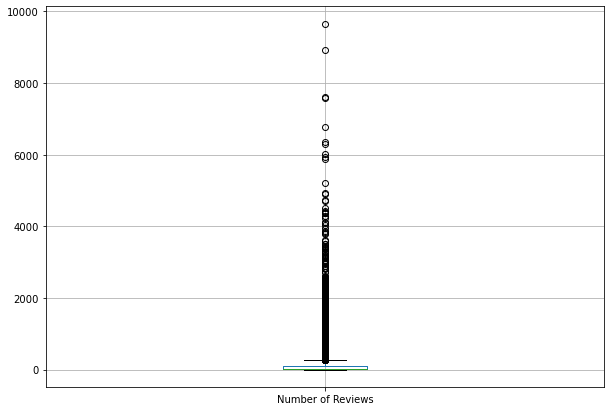

In [74]:
rest.boxplot(column = ['Number of Reviews'])

In [75]:
ind_num6000 = rest[rest['Number of Reviews']>6000].index
ind_num6000

Int64Index([8516, 15779, 16433, 18450, 19251, 27027, 32909, 39071], dtype='int64')

In [76]:
rest['new_feature_1'] = rest['count_cuisine'] * rest['c_days']
rest['new_feature_2'] = rest['Number of Reviews'] * rest['c_days']
rest['new_feature_3'] = np.log10(rest['Ranking'])
rest['new_feature_4'] = rest['Ranking'] * rest['count_cuisine']
rest['new_feature_5'] = rest['Ranking'] * rest['Number of Reviews']
rest['new_feature_6'] = np.log2(rest['Ranking'])

###  Датасет rest_3 со всеми признаками включенные в rest_2 и с dummy  признаками  для "Price Range"

In [77]:
frame = [rest_2, data_nonbinary]
rest_3 = pd.concat(frame, axis = 1)
# rest_3.shape

## Создание датасет с разными комбинированными признаками

In [78]:
frame = [rest_3,rest['new_feature_1']]
rest_4 = pd.concat(frame, axis = 1)
# rest_4.shape

In [79]:
frame = [rest_3,rest['new_feature_2']]
rest_5 = pd.concat(frame, axis = 1)
# rest_5.shape

In [80]:
frame = [rest_3,rest['new_feature_3']]
rest_6 = pd.concat(frame, axis = 1)
# rest_6.shape

In [81]:
frame = [rest_3,rest['new_feature_4']]
rest_7 = pd.concat(frame, axis = 1)
# rest_7.shape

In [82]:
frame = [rest_3,rest['new_feature_5']]
rest_8 = pd.concat(frame, axis = 1)
# rest_8.shape

In [83]:
frame = [rest_3,rest['new_feature_6']]
rest_9 = pd.concat(frame, axis = 1)
# rest_9.shape

In [84]:
frame = [rest_3,rest[['new_feature_3','new_feature_5']]]
rest_10 = pd.concat(frame, axis = 1)
# rest_10.shape

In [85]:
frame = [rest_3,rest[['new_feature_2','new_feature_3']]]
rest_11 = pd.concat(frame, axis = 1)

In [86]:
# rest_1 (без обработки признаков 'Cuisine Style', 'Reviews' и включением признаков 'City' dummy и 'Price Range' в ранговом виде)
# rest_2 (со всеми dummy признаками кухонь и включением нового признака о числе типа кухонь 'count_style' и 
#    обработкой 'Reviews' с получением количества дней ('c_days'), с добавлением признака'Price Range' в ранговом виде)
# rest_3 (со всеми dummy признаками кухонь и включением признака'Price Range' в ранговом виде  и включением его dummy признак)
# rest_4 (со всеми dummy признаками кухонь и включением признака rest['count_cuisine'] * rest['c_days'])
# rest_5 (со всеми dummy признаками кухонь и включением признака rest['Number of Reviews'] * rest['c_days'])
# rest_6 (со всеми dummy признаками кухонь и включением признакак  np.log10(rest['Ranking']))
# rest_7 (со всеми dummy признаками кухонь и включением признака rest['Ranking'] * rest['count_cuisine'])
# rest_8 (со всеми dummy признаками кухонь и включением признака rest['Ranking'] * rest['Number of Reviews']
# rest_9 (со всеми dummy признаками кухонь и включением признака np.log2(rest['Ranking']) 
# rest_10 (со всеми dummy признаками кухонь и включением признака np.log10(rest['Ranking'])  
#    rest['Ranking'] * rest['Number of Reviews']

In [87]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструмент для оценки точности модели

In [88]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = rest_10.drop(['Rating'], axis = 1)
y = rest_10['Rating']

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [89]:
# %timeit
# Создаём модель 
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [90]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2105605


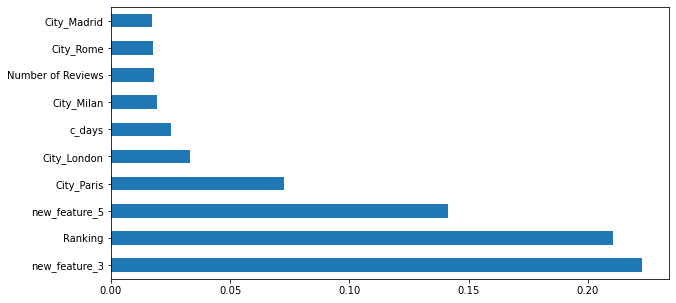

In [91]:
#Вывод важных признаков для модели
plt.rcParams['figure.figsize']=(10,5)
feat_importances = pd.Series(regr.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')

### результаты: ошибки моделей при различных вариантах подготовки датасет